###  ***Importing Basic Libraries required***

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### ***Loading Datasets***

* **Data Dictionary for basic information of features**

In [2]:
data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='latin 1') 
data_dictionary  

            #encoding='latin 1' because, file was not being able to read with UTF-8 encoding....

,Variable,Description
0,EmployeeID,Unique employee code
1,Attrition,Attrition flag
2,Age,Age of employee
3,TravelProfile,Status of travel in job profile
4,Department,Department of employee
5,HomeToWork,Distance between home to work
6,EducationField,Field of education of an employee
7,Gender,Gender of an employee
8,HourlnWeek,Work hours of an employee in a week
9,Involvement,Involvement of any employee in engagement acti...


* **Training Dataset**

In [3]:
data_train = pd.read_csv('Train_Dataset.csv')
data_train

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


for i in data_train.columns:
    print('*****************',i,'********************')
    print(set(data_train[i].values))
    print()

In [4]:
data_train.shape

(7810, 22)

In [5]:
data_train.isnull().sum()

EmployeeID            2630
Attrition             2630
Age                   2946
TravelProfile         2630
Department            2754
HomeToWork            2885
EducationField        2630
Gender                2676
HourlnWeek            2917
Involvement           2630
WorkLifeBalance       2630
Designation           2668
JobSatisfaction       2630
ESOPs                 2630
NumCompaniesWorked    2630
OverTime              2630
SalaryHikelastYear    2799
WorkExperience        2817
LastPromotion         2700
CurrentProfile        2941
MaritalStatus         2630
MonthlyIncome         2723
dtype: int64

***Checking for the individual values from above output shows that there are number of rows(2630) with all values as 'nan'. This has to be eliminated.*** 

In [6]:
data_train =  data_train.dropna(axis=0, how='all')

In [7]:
data_train.shape

(5180, 22)

for i in data_train.columns:
    print('*****************',i,'********************')
    print(set(data_train[i].values))
    print()

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  SalaryHikel

**Thus, unnecessary rows have been removed.**

* **Testing Dataset**

In [9]:
data_test = pd.read_csv('Test_Dataset.csv')
data_test

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,6112626,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3,5,...,5,1,5,1,18.0,10.0,1.0,3.0,Married,26761.0
2626,6112627,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4,4,...,5,0,2,0,18.0,7.0,4.0,4.0,Divorsed,19196.0
2627,6112628,44.0,Rarely,Analytics,8.0,CA,F,42.0,4,1,...,1,1,3,0,19.0,24.0,5.0,17.0,Married,25248.0
2628,6112629,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4,3,...,4,0,2,0,18.0,2.0,1.0,1.0,Single,17261.0


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

### ***Comibining Train and Test data for Pre-processing***

In [11]:
#labelling
data_train['Type'] = 'Train'
data_test['Type'] = 'Test'

In [12]:
data_train.head(2)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0,Train
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0,Train


In [13]:
data_test.head(2)

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0,Test
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0,Test


In [14]:
combined_data = pd.concat([data_train,data_test], axis=0)
combined_data.shape

(7810, 23)

In [15]:
combined_data.head(10)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0,Train
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0,Train
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0,Train
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0,Train
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0,Train
5,5110006.0,1.0,34.0,Yes,Marketing,24.0,MBA,F,43.0,3.0,...,1.0,9.0,1.0,20.0,11.0,0.0,2.0,Married,24950.0,Train
6,5110007.0,0.0,35.0,Yes,Sales,1.0,Marketing Diploma,F,62.0,3.0,...,1.0,1.0,0.0,19.0,10.0,0.0,8.0,Single,23789.0,Train
7,5110008.0,1.0,26.0,Rarely,Sales,8.0,Marketing Diploma,Male,48.0,4.0,...,1.0,2.0,1.0,17.0,7.0,1.0,4.0,Single,21744.0,Train
8,5110009.0,0.0,45.0,Yes,Analytics,5.0,CA,Male,58.0,3.0,...,0.0,6.0,1.0,24.0,17.0,3.0,3.0,Single,26209.0,Train
9,5110010.0,1.0,24.0,Rarely,Sales,4.0,Statistics,Female,65.0,3.0,...,1.0,9.0,0.0,19.0,4.0,2.0,0.0,Single,19577.0,Train


In [16]:
combined_data.tail(10)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
2620,6112621.0,NaN,26.0,Rarely,Analytics,6.0,CA,Male,63.0,3.0,...,1.0,6.0,0.0,19.0,7.0,1.0,3.0,Divorsed,20031.0,Test
2621,6112622.0,NaN,40.0,Yes,Analytics,7.0,CA,Female,53.0,3.0,...,1.0,1.0,0.0,19.0,NaN,4.0,9.0,Single,21042.0,Test
2622,6112623.0,NaN,45.0,Rarely,Analytics,6.0,Statistics,Male,61.0,3.0,...,1.0,5.0,0.0,18.0,11.0,2.0,3.0,Divorsed,18362.0,Test
2623,6112624.0,NaN,33.0,Rarely,Sales,7.0,CA,Male,34.0,5.0,...,0.0,2.0,0.0,17.0,15.0,10.0,9.0,Divorsed,26400.0,Test
2624,6112625.0,NaN,33.0,Rarely,Analytics,1.0,CA,F,65.0,1.0,...,0.0,4.0,0.0,24.0,10.0,0.0,5.0,Married,31184.0,Test
2625,6112626.0,NaN,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,...,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0,Test
2626,6112627.0,NaN,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,...,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0,Test
2627,6112628.0,NaN,44.0,Rarely,Analytics,8.0,CA,F,42.0,4.0,...,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0,Test
2628,6112629.0,NaN,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4.0,...,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0,Test
2629,6112630.0,NaN,50.0,Yes,Analytics,1.0,Statistics,F,73.0,3.0,...,1.0,3.0,1.0,24.0,28.0,0.0,7.0,Married,33172.0,Test


**Testing data has been combined with Training data, with first 5180 rows having 'Type'(label) as 'Train' and remaining 2630 rows having 'Type'(label) as 'Test' as can be observed with head and tail portions of the complete dataset.**

In [17]:
combined_data.describe()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,7.810000e+03,5180.000000,7352.000000,7429.000000,7387.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7547.000000,7501.000000,7683.000000,7365.000000,7684.000000
mean,5.448909e+06,0.278958,37.215860,11.215507,57.940436,3.230986,3.031754,3.134699,0.495391,3.179385,0.319078,20.645157,11.286095,2.589093,4.426477,21736.822098
std,4.720273e+05,0.448530,9.286258,8.590705,13.076675,0.876355,1.412770,1.341073,0.500011,2.625605,0.466149,3.712639,7.910095,3.257934,3.606972,4881.903674
min,5.110001e+06,0.000000,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,5.111953e+06,0.000000,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18377.000000
50%,5.113906e+06,0.000000,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,10.000000,1.000000,3.000000,20229.000000
75%,6.110678e+06,1.000000,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23465.750000
max,6.112630e+06,1.000000,61.000000,123.000000,110.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,96000.000000


### ***Data Pre-processing***

#### ***Null value Imputation***

In [18]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7810 entries, 0 to 2629
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          7810 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 7352 non-null   float64
 3   TravelProfile       7810 non-null   object 
 4   Department          7628 non-null   object 
 5   HomeToWork          7429 non-null   float64
 6   EducationField      7810 non-null   object 
 7   Gender              7734 non-null   object 
 8   HourlnWeek          7387 non-null   float64
 9   Involvement         7810 non-null   float64
 10  WorkLifeBalance     7810 non-null   float64
 11  Designation         7742 non-null   object 
 12  JobSatisfaction     7810 non-null   float64
 13  ESOPs               7810 non-null   float64
 14  NumCompaniesWorked  7810 non-null   float64
 15  OverTime            7810 non-null   float64
 16  SalaryHikel

In [19]:
combined_data.isnull().sum()/len(combined_data) * 100

EmployeeID             0.000000
Attrition             33.674776
Age                    5.864277
TravelProfile          0.000000
Department             2.330346
HomeToWork             4.878361
EducationField         0.000000
Gender                 0.973111
HourlnWeek             5.416133
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.870679
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     3.367478
WorkExperience         3.956466
LastPromotion          1.626120
CurrentProfile         5.697823
MaritalStatus          0.000000
MonthlyIncome          1.613316
Type                   0.000000
dtype: float64

***Data points to be imputed:***
* int/float variables- Age, HomeToWork, HourlnWeek, SalaryHikelastYear, WorkExperience, LastPromotion, CurrentProfile, MonthlyIncome
* Object variables- Department, Gender, Designation

In [20]:
numerical_variables = ['Age', 'HomeToWork', 'HourlnWeek', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome']
object_variables = ['Department', 'Gender', 'Designation']

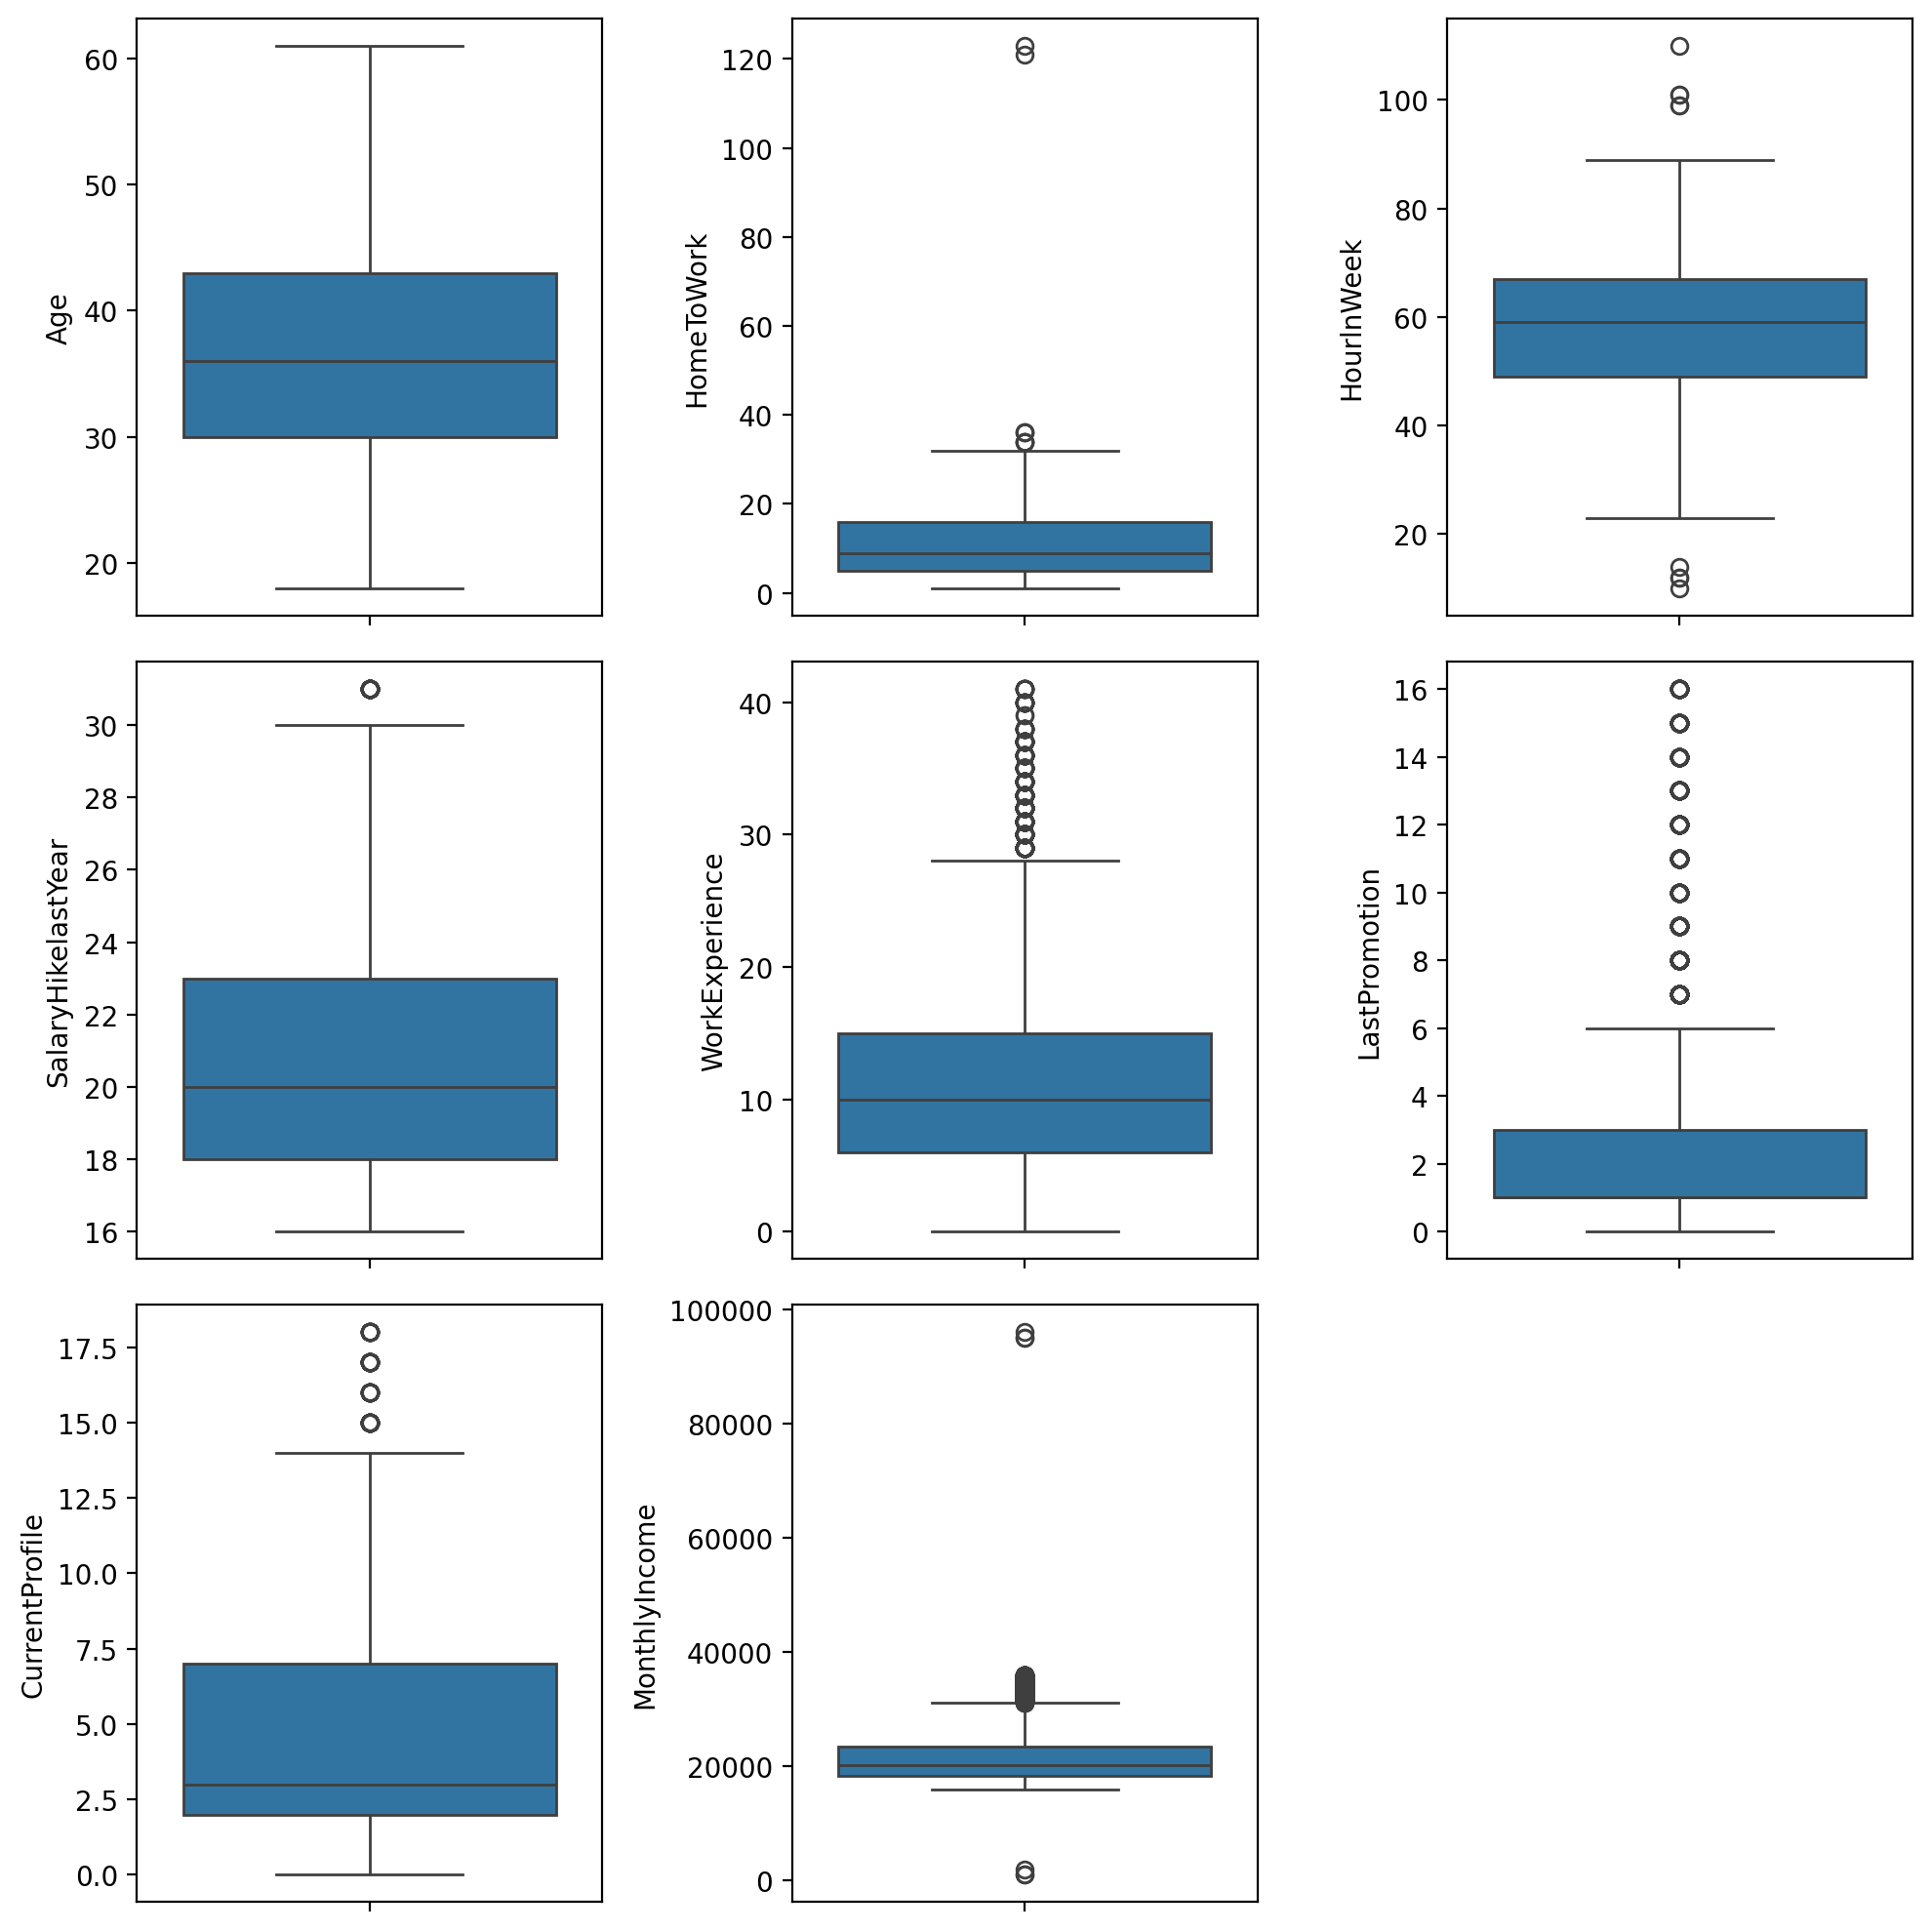

In [21]:
def box_plots(variables_list):
    plt.figure(figsize=(10,10), dpi=200)
    ax_count = 1
    for cols in variables_list:
        plt.subplot(3,3, ax_count)
        sns.boxplot(combined_data[cols])
        ax_count += 1
    plt.tight_layout()
    plt.show()

box_plots(numerical_variables)

* As, outliers are clearly visible from the boxplots, it is wise to go with "median" to impute null values

In [22]:
def num_imputer(variables_list, dataframe):
    for var in variables_list:
        dataframe[var] = dataframe[var].fillna(dataframe[var].median())
    return dataframe

In [23]:
num_imputer(numerical_variables, combined_data)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,3.0,M,18932.0,Train
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,3.0,Single,18785.0,Train
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0,Train
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0,Train
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,6112626.0,NaN,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,...,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0,Test
2626,6112627.0,NaN,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,...,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0,Test
2627,6112628.0,NaN,44.0,Rarely,Analytics,8.0,CA,F,42.0,4.0,...,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0,Test
2628,6112629.0,NaN,36.0,Rarely,Analytics,11.0,Statistics,Female,59.0,4.0,...,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0,Test


* Checking for mode values of the Columns.

In [24]:
print('Department- Mode:',combined_data['Department'].mode())
print('Gender- Mode:', combined_data['Gender'].mode())
print('Designation- Mode:', combined_data['Designation'].mode())

Department- Mode: 0    Analytics
Name: Department, dtype: object
Gender- Mode: 0    Male
Name: Gender, dtype: object
Designation- Mode: 0    Executive
Name: Designation, dtype: object


In [25]:
combined_data['Department'] = combined_data['Department'].fillna('Analytics')
combined_data['Gender'] = combined_data['Gender'].fillna('Male')
combined_data['Designation'] = combined_data['Designation'].fillna('Executive')

In [26]:
combined_data.isnull().sum()

EmployeeID               0
Attrition             2630
Age                      0
TravelProfile            0
Department               0
HomeToWork               0
EducationField           0
Gender                   0
HourlnWeek               0
Involvement              0
WorkLifeBalance          0
Designation              0
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear       0
WorkExperience           0
LastPromotion            0
CurrentProfile           0
MaritalStatus            0
MonthlyIncome            0
Type                     0
dtype: int64

********************All null values have been treated respectively.********************

In [27]:
print('Gender:',set(combined_data['Gender'].values))
print('MaritalStatus:',set(combined_data['MaritalStatus'].values))

Gender: {'Female', 'Male', 'F'}
MaritalStatus: {'M', 'Single', 'Married', 'Divorsed'}


* Also, it is observed in the 'Gender','MaritalStatus' columns, datapoint 'F' and 'M' also exist which can be treated no differently than existing classes 'Female' and 'Married' respectively.
* Having a seperate class for same class may create distortions in the model, hence warrants to be treated as follows

In [28]:
combined_data['Gender'] = np.where(combined_data['Gender']=='F', 'Female', combined_data['Gender'])
combined_data['MaritalStatus'] = np.where(combined_data['MaritalStatus']=='M', 'Married',combined_data['MaritalStatus'])

In [29]:
print('Gender:',set(combined_data['Gender'].values))
print('MaritalStatus:',set(combined_data['MaritalStatus'].values))

Gender: {'Female', 'Male'}
MaritalStatus: {'Single', 'Married', 'Divorsed'}


**************Distortion points also handelled.**************

***Apparently, there are some whitespaces in some varible names which is creating problem while performing df.drop().
Hence, we'll have to treat that.***

In [30]:
#for removing leading/trailing whitespace
list=[]
for i in combined_data.columns:
    i.strip()
    list.append(i)
print(list)

['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department', 'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus', 'MonthlyIncome', 'Type']


In [31]:
combined_data = pd.DataFrame(combined_data, columns=list)
combined_data

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,3.0,Married,18932.0,Train
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,3.0,Single,18785.0,Train
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,...,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0,Train
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0,Train
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,6112626.0,NaN,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,...,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0,Test
2626,6112627.0,NaN,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,...,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0,Test
2627,6112628.0,NaN,44.0,Rarely,Analytics,8.0,CA,Female,42.0,4.0,...,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0,Test
2628,6112629.0,NaN,36.0,Rarely,Analytics,11.0,Statistics,Female,59.0,4.0,...,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0,Test


***Bifurcating combined data to it's original form of train and test....***

In [32]:
training = combined_data[combined_data['Type']=='Train']
testing = combined_data[combined_data['Type']=='Test']

* ***Training Dataset-***

In [33]:
training

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,3.0,Married,18932.0,Train
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,0.0,8.0,0.0,20.0,4.0,1.0,3.0,Single,18785.0,Train
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,...,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0,Train
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0,Train
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176.0,0.0,36.0,Rarely,Analytics,13.0,CA,Female,53.0,3.0,...,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0,Train
5176,5115177.0,0.0,36.0,Rarely,Marketing,9.0,CA,Female,66.0,1.0,...,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0,Train
5177,5115178.0,0.0,29.0,Rarely,Analytics,9.0,CA,Female,62.0,4.0,...,1.0,6.0,0.0,19.0,8.0,0.0,3.0,Married,17532.0,Train
5178,5115179.0,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,...,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0,Train


* ***Testing Dataset-***

In [34]:
testing

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Type
0,6110001.0,NaN,18.0,No,Analytics,9.0,CA,Male,80.0,3.0,...,1.0,1.0,0.0,17.0,0.0,0.0,0.0,Single,16904.0,Test
1,6110002.0,NaN,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1.0,...,1.0,2.0,1.0,18.0,2.0,1.0,3.0,Single,18994.0,Test
2,6110003.0,NaN,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3.0,...,0.0,5.0,1.0,22.0,18.0,3.0,3.0,Married,18587.0,Test
3,6110004.0,NaN,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5.0,...,0.0,4.0,1.0,17.0,5.0,3.0,3.0,Married,20559.0,Test
4,6110005.0,NaN,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4.0,...,1.0,4.0,0.0,20.0,9.0,1.0,7.0,Married,24991.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,6112626.0,NaN,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,...,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0,Test
2626,6112627.0,NaN,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,...,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0,Test
2627,6112628.0,NaN,44.0,Rarely,Analytics,8.0,CA,Female,42.0,4.0,...,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0,Test
2628,6112629.0,NaN,36.0,Rarely,Analytics,11.0,Statistics,Female,59.0,4.0,...,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0,Test


***Dropping those columns not required for the model building...***

In [35]:
training = training.drop(['EmployeeID','Type'], axis=1)
training

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,Married,18932.0
1,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,Single,18785.0
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,36.0,Rarely,Analytics,13.0,CA,Female,53.0,3.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0
5176,0.0,36.0,Rarely,Marketing,9.0,CA,Female,66.0,1.0,4.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5177,0.0,29.0,Rarely,Analytics,9.0,CA,Female,62.0,4.0,2.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,Married,17532.0
5178,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,4.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0


In [36]:
output = testing[['EmployeeID']]
output   
               #This will be used for producing the final report based on the employee Id.

,EmployeeID
0,6110001.0
1,6110002.0
2,6110003.0
3,6110004.0
4,6110005.0
...,...
2625,6112626.0
2626,6112627.0
2627,6112628.0
2628,6112629.0


In [37]:
testing = testing.drop(['EmployeeID','Attrition','Type'], axis=1)
testing

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,18.0,No,Analytics,9.0,CA,Male,80.0,3.0,2.0,Executive,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,Single,16904.0
1,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1.0,3.0,Executive,1.0,1.0,2.0,1.0,18.0,2.0,1.0,3.0,Single,18994.0
2,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3.0,3.0,Executive,5.0,0.0,5.0,1.0,22.0,18.0,3.0,3.0,Married,18587.0
3,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5.0,2.0,Manager,3.0,0.0,4.0,1.0,17.0,5.0,3.0,3.0,Married,20559.0
4,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4.0,1.0,Senior Manager,5.0,1.0,4.0,0.0,20.0,9.0,1.0,7.0,Married,24991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,5.0,Senior Manager,5.0,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0
2626,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,4.0,Executive,5.0,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0
2627,44.0,Rarely,Analytics,8.0,CA,Female,42.0,4.0,1.0,Senior Manager,1.0,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0
2628,36.0,Rarely,Analytics,11.0,Statistics,Female,59.0,4.0,3.0,Executive,4.0,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0


### ***Exploratory Data Analysis***

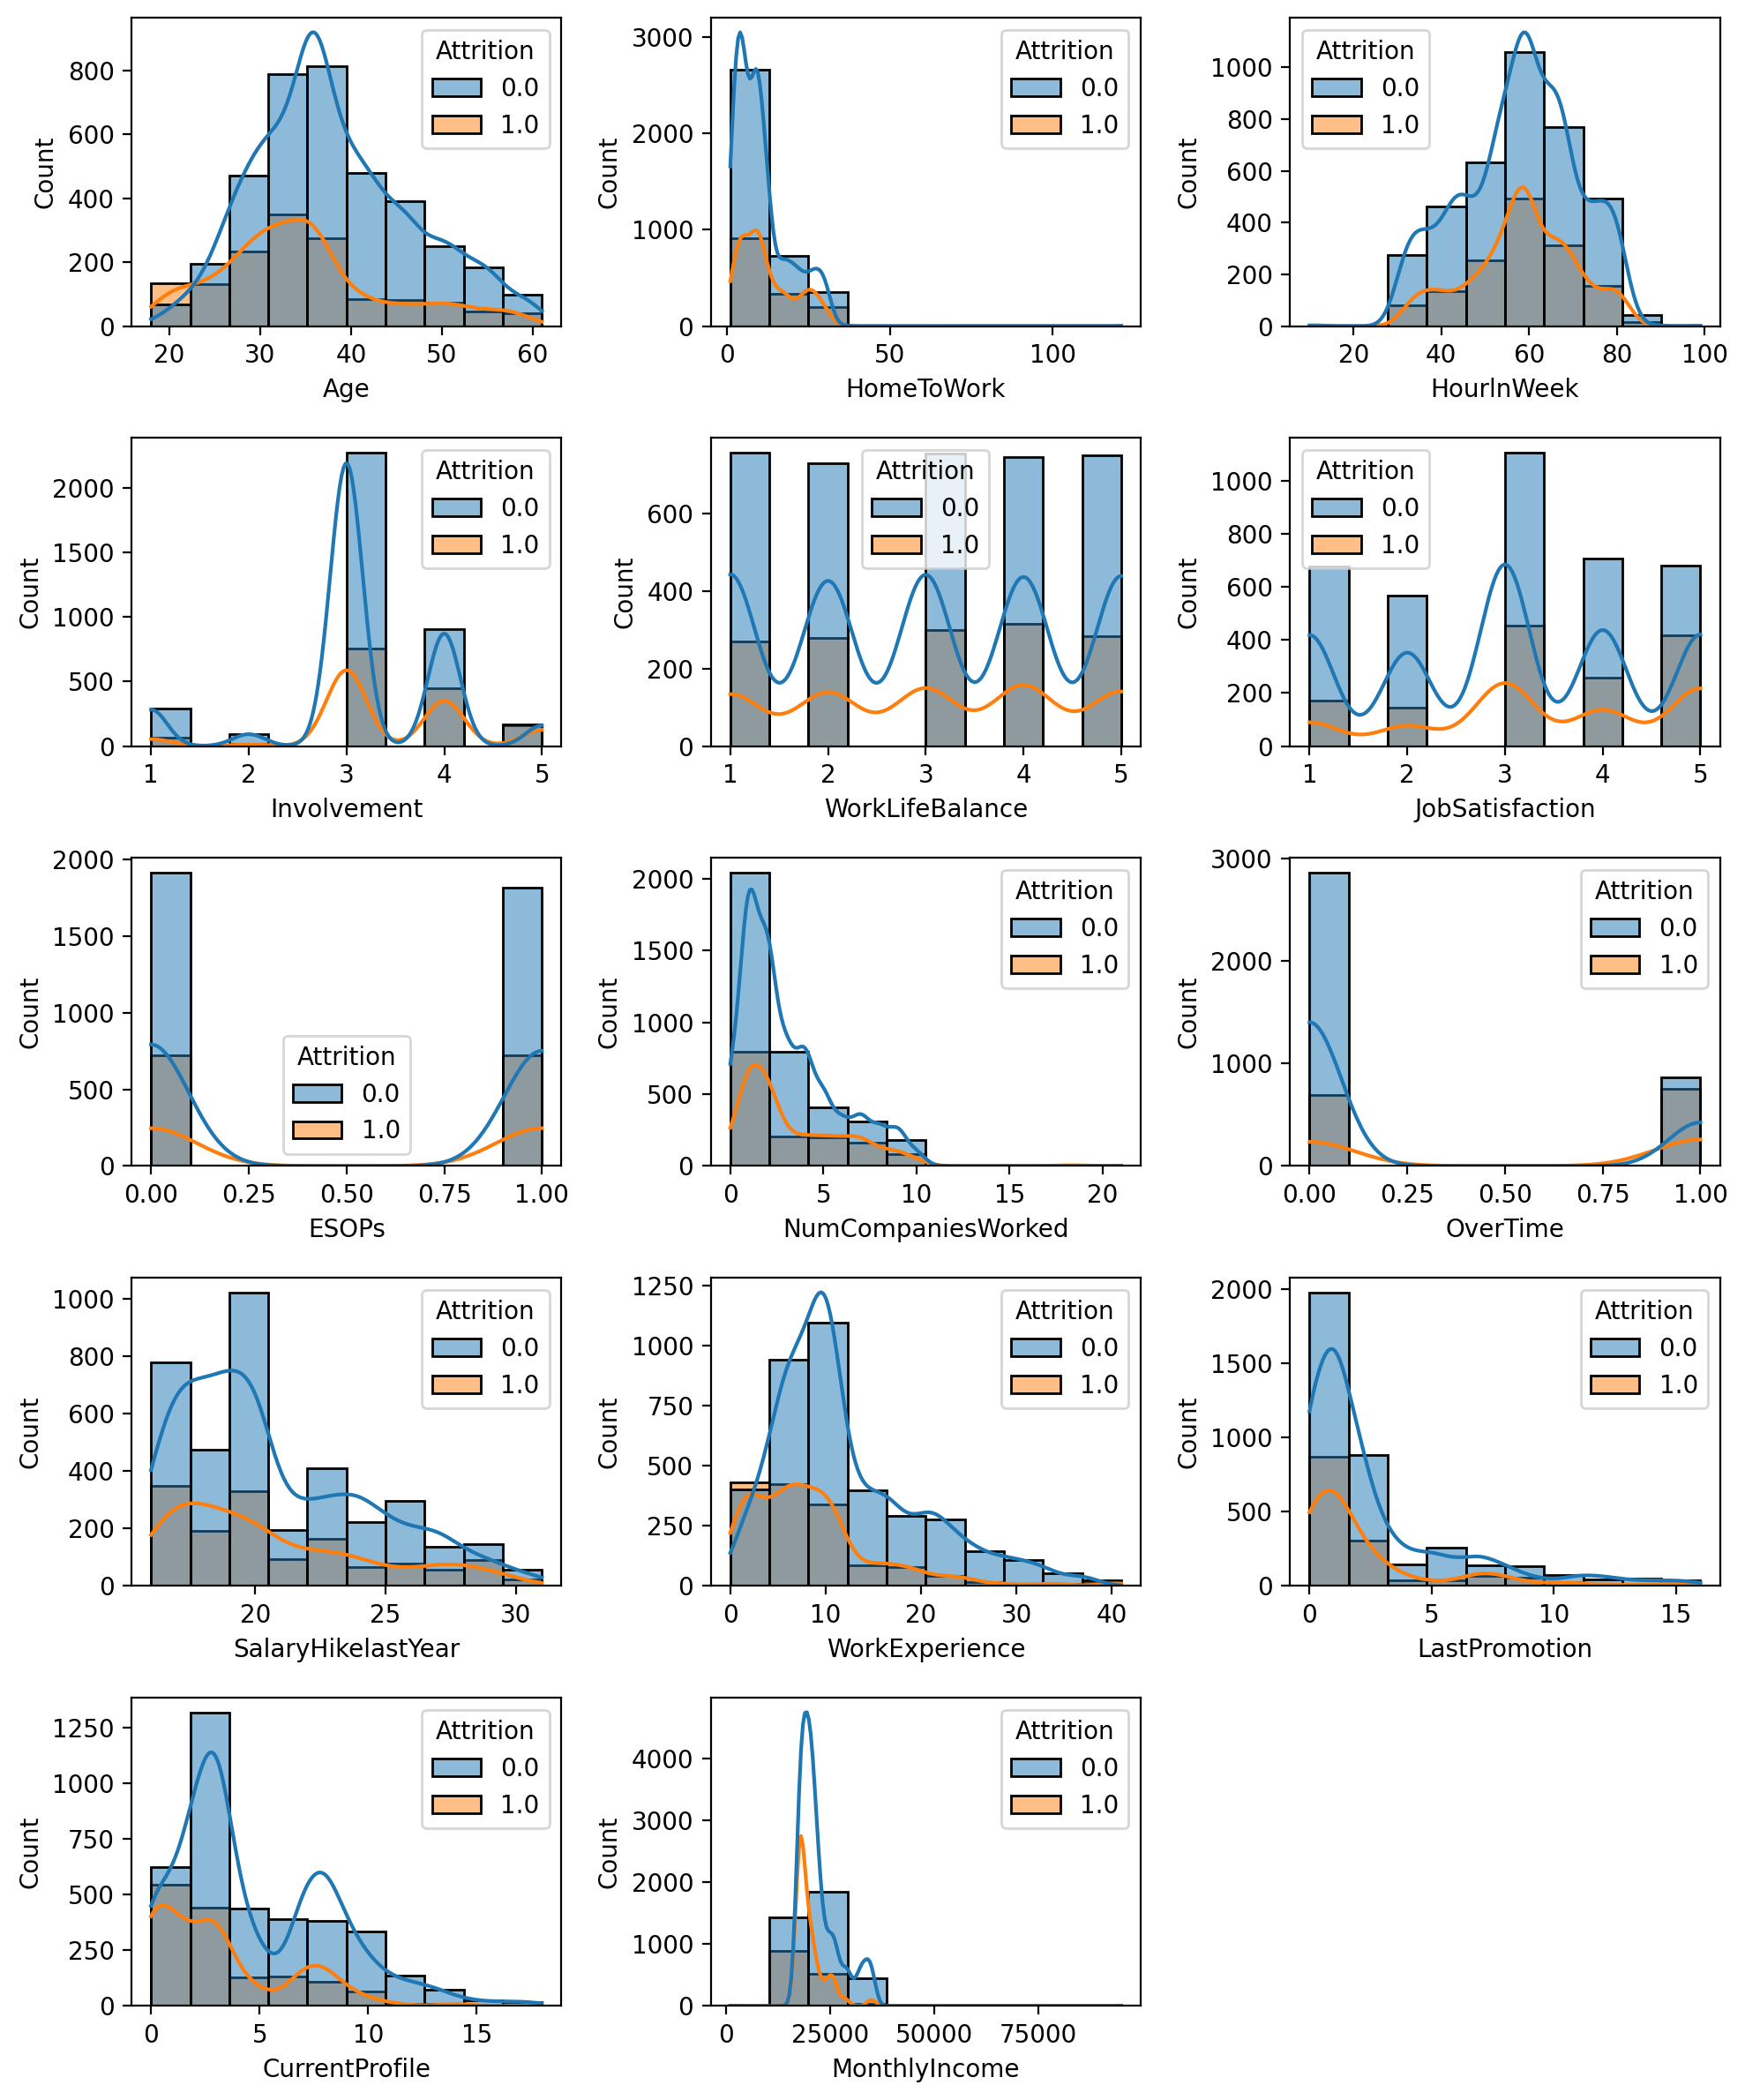

In [38]:
#For Numerical Columns:
plt.figure(figsize=(10,12), dpi=200)
axes_count = 1
for variable in training.select_dtypes(include=['int','float']).columns[1:]:
    plt.subplot(5,3,axes_count)
    sns.histplot(x=variable, data=training, hue='Attrition', kde=True, bins=10)
    if axes_count != 15:
        axes_count += 1
plt.tight_layout()
plt.show()

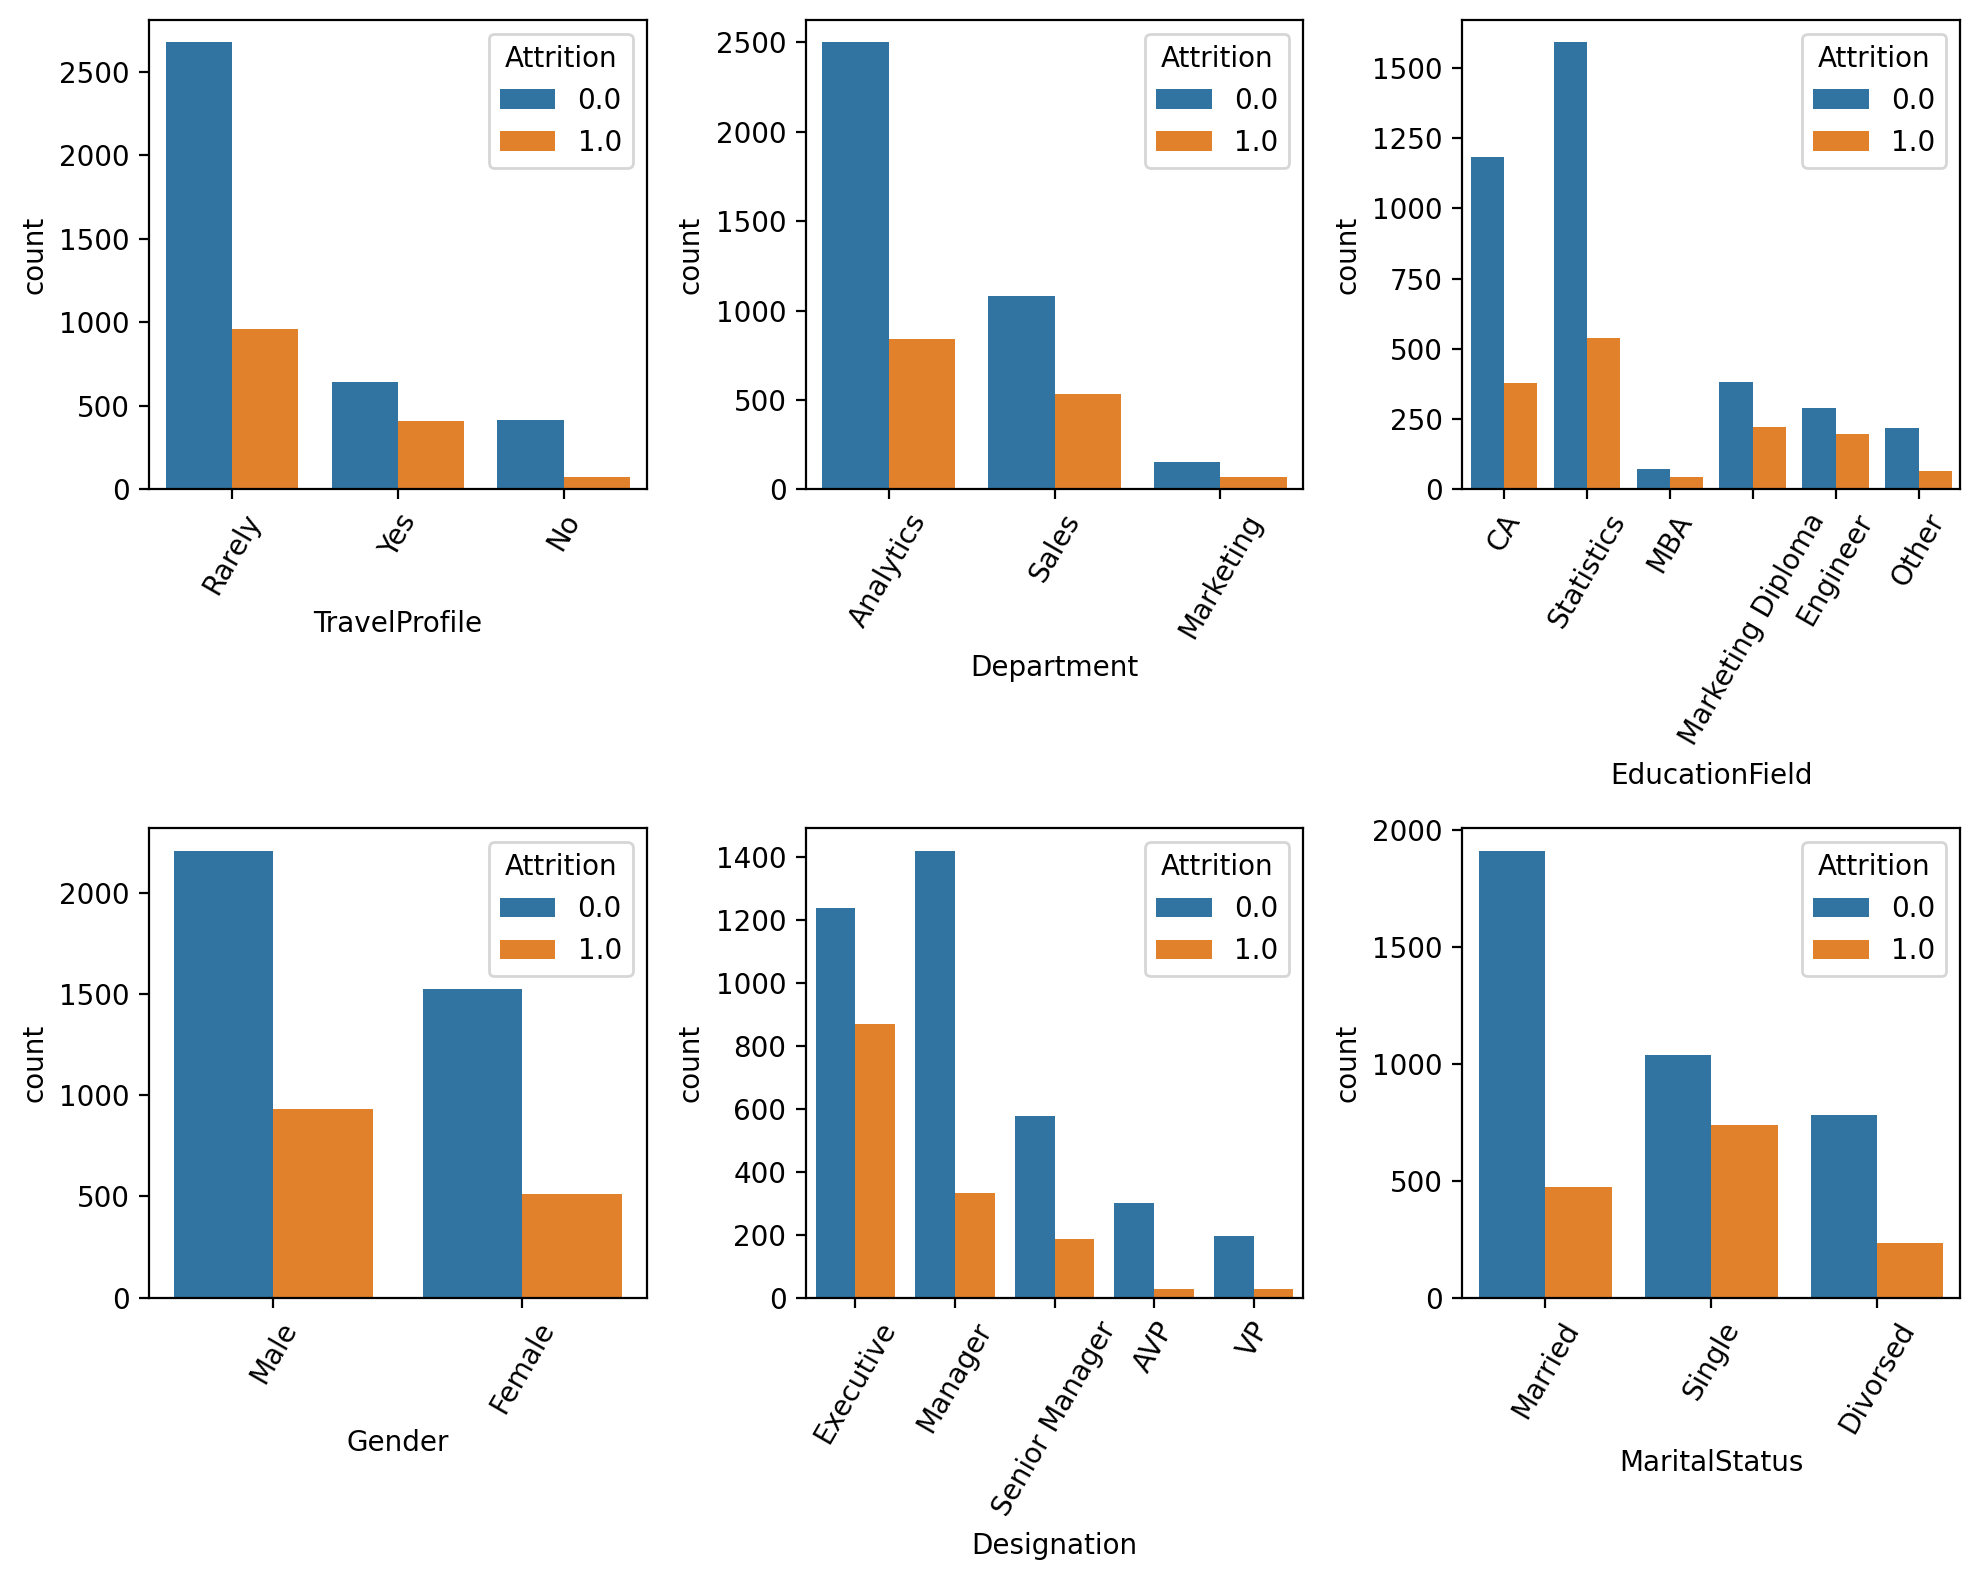

In [39]:
#For Categorical columns:
plt.figure(figsize=(10,8), dpi=200)
axes_count = 1
for variable in training.select_dtypes(include=['object']).columns:
    plt.subplot(2,3,axes_count)
    sns.countplot(x=variable, data=training, hue='Attrition')
    plt.xticks(rotation=60)
    if axes_count != 6:
        axes_count += 1
plt.tight_layout()
plt.show()

**By observing the above distribution of variables we are now able to individually analyse the relationship between a feature and its impact on the attrition rate of employees.**

In [40]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5180 entries, 0 to 5179
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5180 non-null   float64
 1   Age                 5180 non-null   float64
 2   TravelProfile       5180 non-null   object 
 3   Department          5180 non-null   object 
 4   HomeToWork          5180 non-null   float64
 5   EducationField      5180 non-null   object 
 6   Gender              5180 non-null   object 
 7   HourlnWeek          5180 non-null   float64
 8   Involvement         5180 non-null   float64
 9   WorkLifeBalance     5180 non-null   float64
 10  Designation         5180 non-null   object 
 11  JobSatisfaction     5180 non-null   float64
 12  ESOPs               5180 non-null   float64
 13  NumCompaniesWorked  5180 non-null   float64
 14  OverTime            5180 non-null   float64
 15  SalaryHikelastYear  5180 non-null   float64
 16  WorkExperie

#### ***Encoding Object Variables***

In [41]:
for_encoding = []
for i in training.select_dtypes(include='object').columns:
    for_encoding.append(i)
for_encoding

['TravelProfile',
 'Department',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus']

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse_output=False, dtype=np.int32)

encoded_training = encoder.fit_transform(training[['TravelProfile','Department','EducationField',
                                                  'Gender','Designation','MaritalStatus']])
encoded_training
ohe_features = encoder.get_feature_names_out(input_features=for_encoding)

encoded_training_df = pd.DataFrame(encoded_training,columns=ohe_features)
encoded_training_df

,TravelProfile_Rarely,TravelProfile_Yes,Department_Marketing,Department_Sales,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5176,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5177,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5178,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [43]:
training1 = training.copy()
training1

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,Married,18932.0
1,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,Single,18785.0
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,36.0,Rarely,Analytics,13.0,CA,Female,53.0,3.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0
5176,0.0,36.0,Rarely,Marketing,9.0,CA,Female,66.0,1.0,4.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5177,0.0,29.0,Rarely,Analytics,9.0,CA,Female,62.0,4.0,2.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,Married,17532.0
5178,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,4.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0


In [44]:
training1.drop(['TravelProfile','Department','EducationField','Gender','Designation','MaritalStatus'], axis=1, inplace=True)

In [45]:
training_1 = pd.concat([training1,encoded_training_df],axis=1)
training_1

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,0
1,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,...,0,0,1,0,1,0,0,0,0,1
2,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,0
4,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,36.0,13.0,53.0,3.0,3.0,3.0,0.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,1
5176,0.0,36.0,9.0,66.0,1.0,4.0,4.0,1.0,9.0,0.0,...,0,0,0,0,1,0,0,0,0,1
5177,0.0,29.0,9.0,62.0,4.0,2.0,1.0,1.0,6.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5178,0.0,26.0,26.0,61.0,3.0,4.0,3.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,0


In [46]:
encoded_testing = encoder.transform(testing[['TravelProfile','Department','EducationField',
                                                  'Gender','Designation','MaritalStatus']])
ohe_features = encoder.get_feature_names_out(input_features=for_encoding)

encoded_testing_df = pd.DataFrame(encoded_testing,columns=ohe_features)
encoded_testing_df

,TravelProfile_Rarely,TravelProfile_Yes,Department_Marketing,Department_Sales,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
2626,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2627,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2628,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [47]:
testing1 = testing.copy()
testing1

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,18.0,No,Analytics,9.0,CA,Male,80.0,3.0,2.0,Executive,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,Single,16904.0
1,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1.0,3.0,Executive,1.0,1.0,2.0,1.0,18.0,2.0,1.0,3.0,Single,18994.0
2,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3.0,3.0,Executive,5.0,0.0,5.0,1.0,22.0,18.0,3.0,3.0,Married,18587.0
3,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5.0,2.0,Manager,3.0,0.0,4.0,1.0,17.0,5.0,3.0,3.0,Married,20559.0
4,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4.0,1.0,Senior Manager,5.0,1.0,4.0,0.0,20.0,9.0,1.0,7.0,Married,24991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,5.0,Senior Manager,5.0,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0
2626,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,4.0,Executive,5.0,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0
2627,44.0,Rarely,Analytics,8.0,CA,Female,42.0,4.0,1.0,Senior Manager,1.0,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0
2628,36.0,Rarely,Analytics,11.0,Statistics,Female,59.0,4.0,3.0,Executive,4.0,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0


In [48]:
testing1.drop(['TravelProfile','Department','EducationField','Gender','Designation','MaritalStatus'], axis=1, inplace=True)

In [49]:
testing_1 = pd.concat([testing1,encoded_testing_df],axis=1)
testing_1

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,18.0,9.0,80.0,3.0,2.0,3.0,1.0,1.0,0.0,17.0,...,0,0,0,1,1,0,0,0,0,1
1,20.0,28.0,59.0,1.0,3.0,1.0,1.0,2.0,1.0,18.0,...,0,0,1,0,1,0,0,0,0,1
2,50.0,19.0,76.0,3.0,3.0,5.0,0.0,5.0,1.0,22.0,...,0,0,0,0,1,0,0,0,1,0
3,32.0,23.0,73.0,5.0,2.0,3.0,0.0,4.0,1.0,17.0,...,0,0,1,0,0,1,0,0,1,0
4,39.0,7.0,42.0,4.0,1.0,5.0,1.0,4.0,0.0,20.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,46.0,12.0,76.0,3.0,5.0,5.0,1.0,5.0,1.0,18.0,...,1,0,0,1,0,0,1,0,1,0
2626,29.0,22.0,80.0,4.0,4.0,5.0,0.0,2.0,0.0,18.0,...,0,0,0,1,1,0,0,0,0,0
2627,44.0,8.0,42.0,4.0,1.0,1.0,1.0,3.0,0.0,19.0,...,0,0,0,0,0,0,1,0,1,0
2628,36.0,11.0,59.0,4.0,3.0,4.0,0.0,2.0,0.0,18.0,...,0,0,1,0,1,0,0,0,0,1


**Encoding of Object variables done for both training and testing data.**

#### ***Seperating Dependent and Independent variables***

In [50]:
x = training_1.drop(['Attrition'], axis=1)  #independent variable
y = training_1.iloc[:,0]                    #dependent variable

In [51]:
x.head(2)

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,...,0,0,0,1,1,0,0,0,1,0
1,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,...,0,0,1,0,1,0,0,0,0,1


In [52]:
y.head(2)

0    0.0
1    1.0
Name: Attrition, dtype: float64

#### ***Check for balance or imbalance data***

In [53]:
y.value_counts()

Attrition
0.0    3735
1.0    1445
Name: count, dtype: int64

***Clearly, the data is imbalanced. So, it is important to ensure that both the classes are fed to the model to avoid the bias problem. 
It is wise to use 'stratify' method while splitting the data for train and test.***

***Before going for train test split we'll have to scale the features. Here, Standardization method will be used for the same.***

#### ***Feature Scaling***

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled_df

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,-0.227652,-0.727137,0.867906,-2.552472,-1.427005,-1.597145,1.019101,-0.827903,1.479748,-0.172249,...,-0.362968,-0.240845,-0.835347,0.806028,1.206224,-0.716136,-0.415622,-0.212101,1.081286,-0.722315
1,-0.562283,-0.727137,0.313774,0.886527,-0.009033,-0.852347,-0.981257,1.858429,-0.675791,-0.172249,...,-0.362968,-0.240845,1.197108,-1.240651,1.206224,-0.716136,-0.415622,-0.212101,-0.924825,1.384437
2,-0.673826,-0.727137,-1.031976,2.032860,-0.009033,-0.852347,1.019101,-0.060379,-0.675791,1.472954,...,-0.362968,-0.240845,1.197108,-1.240651,-0.829033,1.396383,-0.415622,-0.212101,-0.924825,1.384437
3,-0.339196,-0.121560,-2.061078,-0.259806,-0.718019,0.637248,1.019101,-0.827903,-0.675791,0.650353,...,-0.362968,-0.240845,1.197108,-1.240651,-0.829033,1.396383,-0.415622,-0.212101,-0.924825,-0.722315
4,-0.004565,1.937403,-0.715329,-0.259806,0.699952,0.637248,1.019101,1.858429,-0.675791,0.101952,...,-0.362968,-0.240845,1.197108,-1.240651,-0.829033,1.396383,-0.415622,-0.212101,-0.924825,-0.722315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,-0.116109,0.241787,-0.398682,-0.259806,-0.009033,-0.107550,-0.981257,0.323382,1.479748,0.376152,...,-0.362968,-0.240845,-0.835347,-1.240651,-0.829033,1.396383,-0.415622,-0.212101,-0.924825,1.384437
5176,-0.116109,-0.242675,0.630421,-2.552472,0.699952,0.637248,1.019101,2.242190,-0.675791,0.650353,...,-0.362968,-0.240845,-0.835347,-1.240651,1.206224,-0.716136,-0.415622,-0.212101,-0.924825,1.384437
5177,-0.896913,-0.242675,0.313774,0.886527,-0.718019,-1.597145,1.019101,1.090905,-0.675791,-0.446449,...,-0.362968,-0.240845,-0.835347,-1.240651,1.206224,-0.716136,-0.415622,-0.212101,1.081286,-0.722315
5178,-1.231544,1.816287,0.234612,-0.259806,0.699952,-0.107550,-0.981257,-0.827903,-0.675791,2.021355,...,-0.362968,-0.240845,1.197108,-1.240651,1.206224,-0.716136,-0.415622,-0.212101,-0.924825,-0.722315


In [55]:
testing_scaled = scaler.transform(testing_1)
testing_scaled_df = pd.DataFrame(testing_scaled, columns=testing_1.columns)

#### ***Train-Test split***

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=501, stratify=y)
print('x_train:',x_train.shape, 'x_test:',x_test.shape)
print('y_train:',y_train.shape, 'y_test:',y_test.shape)

x_train: (3885, 30) x_test: (1295, 30)
y_train: (3885,) y_test: (1295,)


### ***Model Building***

#### ***1)------Logistic Regression------***

In [57]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
print('Logistic_Regression Model Accuracy Train:', accuracy_score(y_train, y_pred_train_logit))
print('-----------------------------------------------------------------------------')
print('Logistic_Regression Model Accuracy Test:', accuracy_score(y_test, y_pred_test_logit))

Logistic_Regression Model Accuracy Train: 0.8185328185328186
-----------------------------------------------------------------------------
Logistic_Regression Model Accuracy Test: 0.8061776061776061


In [61]:
print('Logistic_Regression Model Classification_report Train:') 
print(classification_report(y_train, y_pred_train_logit))
print('-----------------------------------------------------------------------------')
print('Logistic_Regression Model Classification_report Test:') 
print(classification_report(y_test, y_pred_test_logit))

Logistic_Regression Model Classification_report Train:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      2801
         1.0       0.73      0.56      0.63      1084

    accuracy                           0.82      3885
   macro avg       0.79      0.74      0.76      3885
weighted avg       0.81      0.82      0.81      3885

-----------------------------------------------------------------------------
Logistic_Regression Model Classification_report Test:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       934
         1.0       0.70      0.53      0.60       361

    accuracy                           0.81      1295
   macro avg       0.77      0.72      0.74      1295
weighted avg       0.80      0.81      0.80      1295



In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(logit, x_train,y_train, cv=10).mean()

0.8136432300638698

**LOGISTIC REGRESSION Model doesn't seem to overfit**

#### ***2)------Decision Tree Classification------***

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred_train_dtree = dtree.predict(x_train)
y_pred_test_dtree = dtree.predict(x_test)

In [65]:
print('Decision_Tree_Classifier Model Accuracy Train:', accuracy_score(y_train, y_pred_train_dtree))
print('-----------------------------------------------------------------------------')
print('Decision_Tree_Classifier Model Accuracy Test:', accuracy_score(y_test, y_pred_test_dtree))

Decision_Tree_Classifier Model Accuracy Train: 1.0
-----------------------------------------------------------------------------
Decision_Tree_Classifier Model Accuracy Test: 0.9536679536679536


In [66]:
print('Decision_Tree_Classifier Model Classification_report Train:') 
print(classification_report(y_train, y_pred_train_dtree))
print('-----------------------------------------------------------------------------')
print('Decision_Tree_Classifier Model Classification_report Test:') 
print(classification_report(y_test, y_pred_test_dtree))

Decision_Tree_Classifier Model Classification_report Train:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2801
         1.0       1.00      1.00      1.00      1084

    accuracy                           1.00      3885
   macro avg       1.00      1.00      1.00      3885
weighted avg       1.00      1.00      1.00      3885

-----------------------------------------------------------------------------
Decision_Tree_Classifier Model Classification_report Test:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       934
         1.0       0.88      0.96      0.92       361

    accuracy                           0.95      1295
   macro avg       0.93      0.96      0.94      1295
weighted avg       0.96      0.95      0.95      1295



***Looking at the training accuracy, it can be concluded that the Decision_Tree_Classifier Model is overfitting i.e. 'high variance' problem.
Its better to check cross validation score.***

In [67]:
cross_val_score(dtree, x_train, y_train,cv=10 ).mean()

0.9462042509209445

* ***Before proceeding there is one more thing to check that is influence of outliers. We haven't treated them as we were handling the classification problem***

In [68]:
def out_cap(variables_list, dataframe):
    for var in variables_list:
        q1=dataframe[var].quantile(0.25)
        q3=dataframe[var].quantile(0.75)
        iqr=q3-q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        dataframe[var].clip(lower=lower_limit,upper=upper_limit, inplace=True)
    return dataframe

In [69]:
out_cap(numerical_variables,training_1)

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,0
1,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,...,0,0,1,0,1,0,0,0,0,1
2,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,0
4,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,36.0,13.0,53.0,3.0,3.0,3.0,0.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,1
5176,0.0,36.0,9.0,66.0,1.0,4.0,4.0,1.0,9.0,0.0,...,0,0,0,0,1,0,0,0,0,1
5177,0.0,29.0,9.0,62.0,4.0,2.0,1.0,1.0,6.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5178,0.0,26.0,26.0,61.0,3.0,4.0,3.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,0


In [70]:
out_cap(numerical_variables,testing_1)

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,18.0,9.0,80.0,3.0,2.0,3.0,1.0,1.0,0.0,17.0,...,0,0,0,1,1,0,0,0,0,1
1,20.0,28.0,59.0,1.0,3.0,1.0,1.0,2.0,1.0,18.0,...,0,0,1,0,1,0,0,0,0,1
2,50.0,19.0,76.0,3.0,3.0,5.0,0.0,5.0,1.0,22.0,...,0,0,0,0,1,0,0,0,1,0
3,32.0,23.0,73.0,5.0,2.0,3.0,0.0,4.0,1.0,17.0,...,0,0,1,0,0,1,0,0,1,0
4,39.0,7.0,42.0,4.0,1.0,5.0,1.0,4.0,0.0,20.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,46.0,12.0,76.0,3.0,5.0,5.0,1.0,5.0,1.0,18.0,...,1,0,0,1,0,0,1,0,1,0
2626,29.0,22.0,80.0,4.0,4.0,5.0,0.0,2.0,0.0,18.0,...,0,0,0,1,1,0,0,0,0,0
2627,44.0,8.0,42.0,4.0,1.0,1.0,1.0,3.0,0.0,19.0,...,0,0,0,0,0,0,1,0,1,0
2628,36.0,11.0,59.0,4.0,3.0,4.0,0.0,2.0,0.0,18.0,...,0,0,1,0,1,0,0,0,0,1


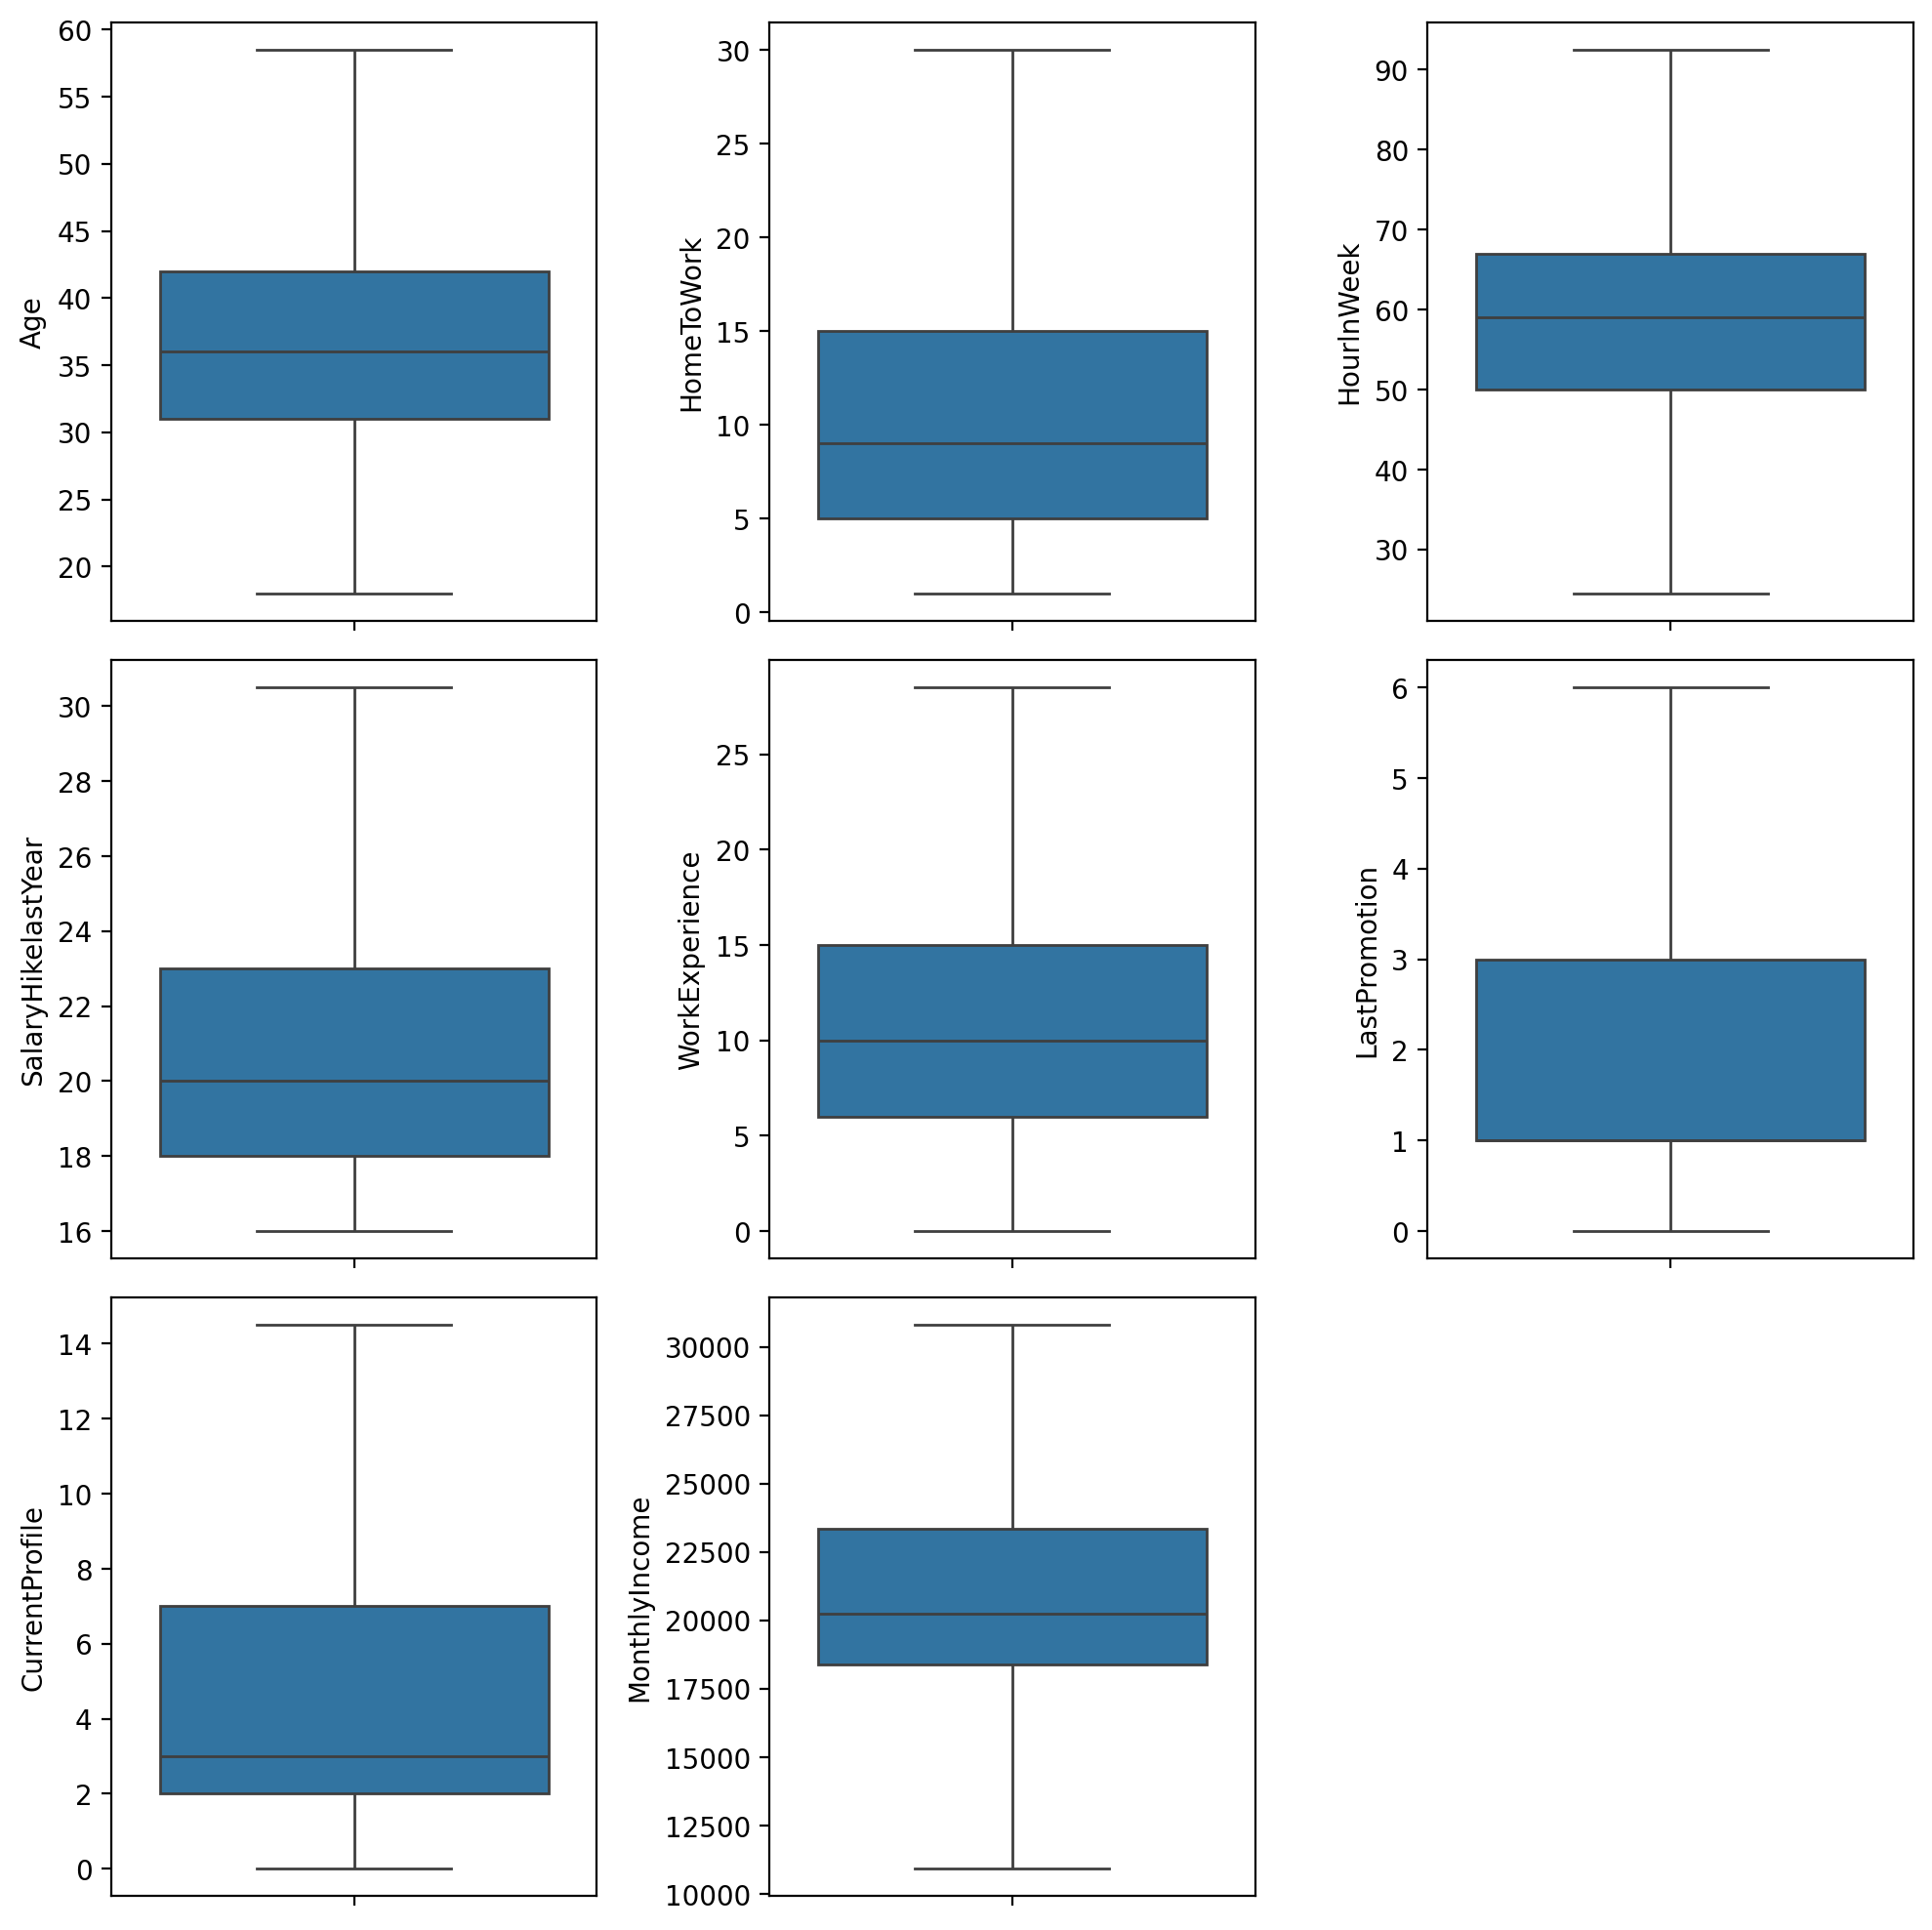

In [71]:
def box_plots(variables_list):
    plt.figure(figsize=(10,10), dpi=200)
    ax_count = 1
    for cols in variables_list:
        plt.subplot(3,3, ax_count)
        sns.boxplot(training_1[cols])
        ax_count += 1
    plt.tight_layout()
    plt.show()

box_plots(numerical_variables)

* Outliers treated...!

In [72]:
x1 = training_1.drop(['Attrition'],axis=1)
x1

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,...,0,0,0,1,1,0,0,0,1,0
1,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,...,0,0,1,0,1,0,0,0,0,1
2,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,...,0,0,1,0,0,1,0,0,0,1
3,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,...,0,0,1,0,0,1,0,0,0,0
4,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,36.0,13.0,53.0,3.0,3.0,3.0,0.0,4.0,1.0,22.0,...,0,0,0,0,0,1,0,0,0,1
5176,36.0,9.0,66.0,1.0,4.0,4.0,1.0,9.0,0.0,23.0,...,0,0,0,0,1,0,0,0,0,1
5177,29.0,9.0,62.0,4.0,2.0,1.0,1.0,6.0,0.0,19.0,...,0,0,0,0,1,0,0,0,1,0
5178,26.0,26.0,61.0,3.0,4.0,3.0,0.0,1.0,0.0,28.0,...,0,0,1,0,1,0,0,0,0,0


In [73]:
y1 = training_1[['Attrition']]
y1

,Attrition
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
5175,0.0
5176,0.0
5177,0.0
5178,0.0


In [74]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.25,random_state=5,stratify=y1)
print('x_train1:',x_train1.shape, 'x_test1:',x_test1.shape)
print('y_train1:',y_train1.shape, 'y_test1:',y_test1.shape)

x_train1: (3885, 30) x_test1: (1295, 30)
y_train1: (3885, 1) y_test1: (1295, 1)


In [75]:
logit1 = LogisticRegression()
logit1.fit(x_train1, y_train1)

LogisticRegression()

In [76]:
logit1.score(x_train1,y_train1)

0.7405405405405405

In [77]:
logit1.score(x_test1,y_test1)

0.7629343629343629

In [78]:
cross_val_score(logit1,x_train1,y_train1,cv=10).mean()

0.7431214056661278

In [79]:
DTree1 = DecisionTreeClassifier()
DTree1.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [80]:
DTree1.score(x_train1,y_train1)

1.0

In [81]:
DTree1.score(x_test1,y_test1)

0.9590733590733591

In [82]:
cross_val_score(DTree1,x_train1,y_train1,cv=10).mean()

0.9490287016669757

* **So, for 'Logistic Regression' , accuracy has degraded while in case of 'Decision Tree' there isn't much impact on the accuracy score. We will stick to our original model without treating outliers.**

***>>>Before applying the model directly to the testing dataset for predictions, it is wise to perform ***'hyperparameter tuning'*** to overcome the problems like 'overfitting' and bringing the model to an optimal level of its performance by identifying the patterns for getting "maximum" correct predictions
This may lead to reduction in the model accuracy level, but will ensure that the model so built is robust and adptable to new and unseen data.***

#### ***Hyperparameter Tuning***

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 7, 10],
              'min_samples_leaf': [1, 2, 3, 4]}

DTree_hyper = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=DTree_hyper, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9317889317889317


****We have got the "best parameters" to be used in the model, with the accuracy slightly dropped but the model is now more reliable and can evaluate the underlying patterns even better than the original model (DecisionTree).****

### ***Applying the Model for Predictions***

In [84]:
final_model = grid_search.best_estimator_
output_testing = final_model.predict(testing_1)
output_testing

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
Prediction_Results = pd.concat([output, pd.DataFrame(output_testing, columns=['Attrition'])],axis=1)
Prediction_Results

,EmployeeID,Attrition
0,6110001.0,0.0
1,6110002.0,0.0
2,6110003.0,0.0
3,6110004.0,0.0
4,6110005.0,0.0
...,...,...
2625,6112626.0,0.0
2626,6112627.0,0.0
2627,6112628.0,0.0
2628,6112629.0,0.0


In [86]:
Prediction_Results[Prediction_Results.values == 1]

,EmployeeID,Attrition
20,6110021.0,1.0
21,6110022.0,1.0
23,6110024.0,1.0
27,6110028.0,1.0
30,6110031.0,1.0
...,...,...
2594,6112595.0,1.0
2603,6112604.0,1.0
2618,6112619.0,1.0
2619,6112620.0,1.0


In [87]:
Prediction_Results[Prediction_Results.values == 0]

,EmployeeID,Attrition
0,6110001.0,0.0
1,6110002.0,0.0
2,6110003.0,0.0
3,6110004.0,0.0
4,6110005.0,0.0
...,...,...
2625,6112626.0,0.0
2626,6112627.0,0.0
2627,6112628.0,0.0
2628,6112629.0,0.0


### ***Saving as '.csv' file***

In [88]:
Prediction_Results.to_csv('Prediction_Results.csv', index=False)